# Importando Bibliotecas

In [ ]:
# BIBLIOTECAS UTILIZADAS NESTE PROJETO

import pandas as pd
import numpy as np
import itertools

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [178]:
# VERSÕES DOS PACOTES USADOS NESTE JUPYTER NOTEBOOK
%reload_ext watermark
%watermark -a "Apolo Ferreira Santos" --iversions

Author: Apolo Ferreira Santos

seaborn   : 0.11.1
matplotlib: 3.3.4
numpy     : 1.20.1
pandas    : 1.2.4



In [127]:
# CARREGANDO DATASET
dataset = pd.read_csv('measures_v2.csv')

In [128]:
# DEFININDO VARIÁVEIS ALVO
target_name = ['stator_yoke', 'stator_winding', 'stator_tooth', 'pm']

# Análise dos Dados

In [129]:
# VISUALIZANDO DATASET
dataset.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17


In [130]:
# QUANTIDADE DE LINHAS E COLUNAS
dataset.shape

(1330816, 13)

Através da análise dos dados foi realizado alguns cálculos com a combinação de atributos para adicionar informação a respeito do motor eletrico.<br>
Desta forma, mediante as tensões e correntes das coordenadas, foi adicionado as grandezas de pôtencia ativa (watts) e reativa (VAr).

Referências:
- https://www.mathworks.com/help/physmod/sps/powersys/ref/powerdq0instantaneous.html
- http://lejpt.academicdirect.org/A06/17_28.pdf

In [131]:
# Potência ativa
dataset['P'] = (dataset['u_d']*dataset['i_d']) + (dataset['u_q'] * dataset['i_q'])

# Potência reativa
dataset['Q'] = (3/2)*((dataset['u_q']*dataset['i_d']) - (dataset['u_d'] * dataset['i_q']))

In [132]:
# VERIFICANDO A EXISTÊNCIA DE VALORES NULOS
dataset.isnull().sum()

u_q               0
coolant           0
stator_winding    0
u_d               0
stator_tooth      0
motor_speed       0
i_d               0
i_q               0
pm                0
stator_yoke       0
ambient           0
torque            0
profile_id        0
P                 0
Q                 0
dtype: int64

In [133]:
# VISUALIZANDO CARACTERÍSTICAS GERAIS DOS DADOS
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 15 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1330816 non-null  float64
 1   coolant         1330816 non-null  float64
 2   stator_winding  1330816 non-null  float64
 3   u_d             1330816 non-null  float64
 4   stator_tooth    1330816 non-null  float64
 5   motor_speed     1330816 non-null  float64
 6   i_d             1330816 non-null  float64
 7   i_q             1330816 non-null  float64
 8   pm              1330816 non-null  float64
 9   stator_yoke     1330816 non-null  float64
 10  ambient         1330816 non-null  float64
 11  torque          1330816 non-null  float64
 12  profile_id      1330816 non-null  int64  
 13  P               1330816 non-null  float64
 14  Q               1330816 non-null  float64
dtypes: float64(14), int64(1)
memory usage: 152.3 MB


In [134]:
# VISUALIZANDO RANGE DOS VALORES DOS ATRIBUTOS
dataset.describe().round(3)

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id,P,Q
count,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000
mean,54.279,36.230,66.343,-25.134,56.879,2202.081,-68.717,37.413,58.507,48.188,24.565,31.106,40.793,5087.226,1691.866
std,44.173,21.786,28.672,63.092,22.952,1859.663,64.933,92.182,19.001,19.991,1.930,77.136,25.045,12388.695,10194.371
min,-25.291,10.624,18.586,-131.530,18.134,-275.549,-278.004,-293.427,20.857,18.077,8.783,-246.467,2.000,-31011.641,-23979.779
25%,12.070,18.698,42.788,-78.691,38.416,317.111,-115.406,1.096,43.152,31.990,23.185,-0.137,17.000,-3.129,-357.773
50%,48.938,26.900,65.110,-7.430,56.036,1999.977,-51.094,15.774,60.266,45.626,24.797,10.860,43.000,971.727,5.247
75%,90.034,49.857,88.141,1.470,75.587,3760.639,-2.980,100.612,72.008,61.461,26.217,91.597,65.000,14150.308,6893.073
max,133.037,101.599,141.363,131.470,111.946,6000.015,0.052,301.708,113.607,101.148,30.714,261.006,81.000,34981.093,49850.981


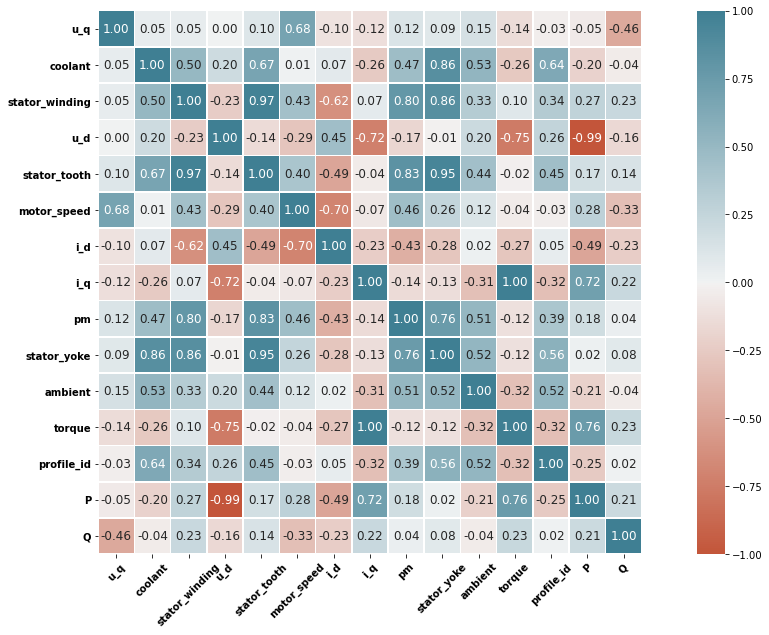

In [135]:
# ÁREA DE PLOTAGEM
plt.figure(figsize = (20,10))

# MATRIZ DE CORRELAÇÃO
correlation = dataset.corr()

ax = sns.heatmap(correlation,
                 annot=True, 
                 annot_kws = {'size': 12}, 
                 fmt = '.2f', 
                 vmin = -1, vmax = 1, center = 0,
                 cmap = sns.diverging_palette(20, 220, n=256), 
                 linewidths = .5, 
                 square = True)

ax.set_yticklabels(ax.get_yticklabels(),
                  rotation = 0,
                  horizontalalignment = 'right', 
                  fontweight='bold')

ax.set_xticklabels(ax.get_xticklabels(),
                  rotation = 45,
                  horizontalalignment = 'center', 
                  fontweight='bold')
plt.show()

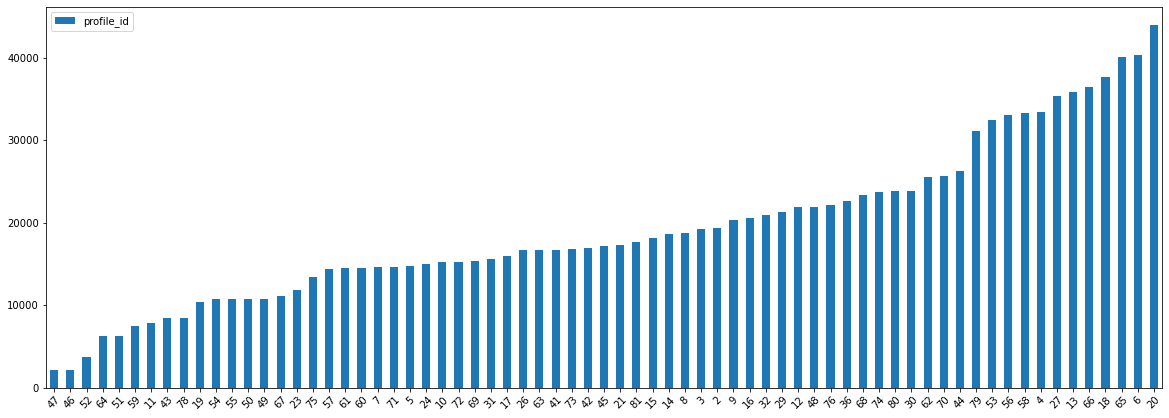

In [183]:
# QUANTIDADE DE AMOSTRAS POR ID

fig, ax = plt.subplots(figsize=(20,7))
ax = dataset['profile_id'].value_counts().sort_values().plot(kind='bar')
plt.xticks(rotation=45, horizontalalignment='center')
ax.legend()
plt.show()

<AxesSubplot:title={'center':'Correlação das Variáveis de Entrada com a Classe de Saída'}>

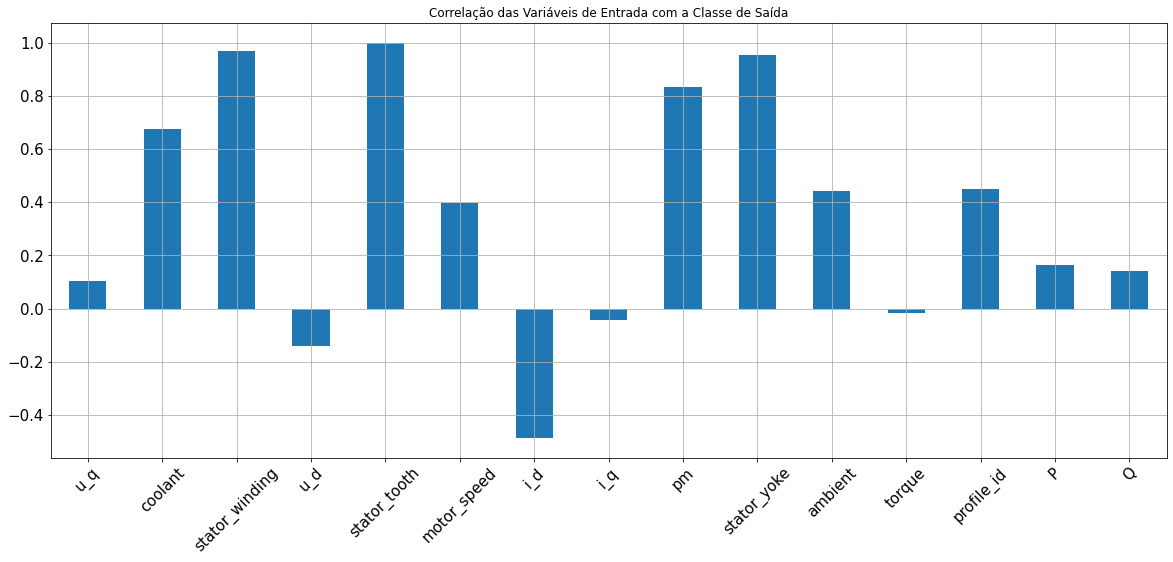

In [179]:
# CORRELAÇÃO DE CADA VARIÁVEL DE ENTRADA COM RELAÇÃO A CLASSE DE SAÍDA STATOR TOOTH
dataset.corrwith(dataset.stator_tooth).plot.bar(figsize = (20, 8), 
                                                   title = "Correlação das Variáveis de Entrada com a Classe de Saída", 
                                                   fontsize = 15, 
                                                   rot = 45, 
                                                   grid = True)

In [137]:
# CRIANDO LISTA COM OS ATRIBUTOS E REMOVENDO ID (profile_id não será usado)
columns_name = list(dataset.columns)
columns_name.remove('profile_id')

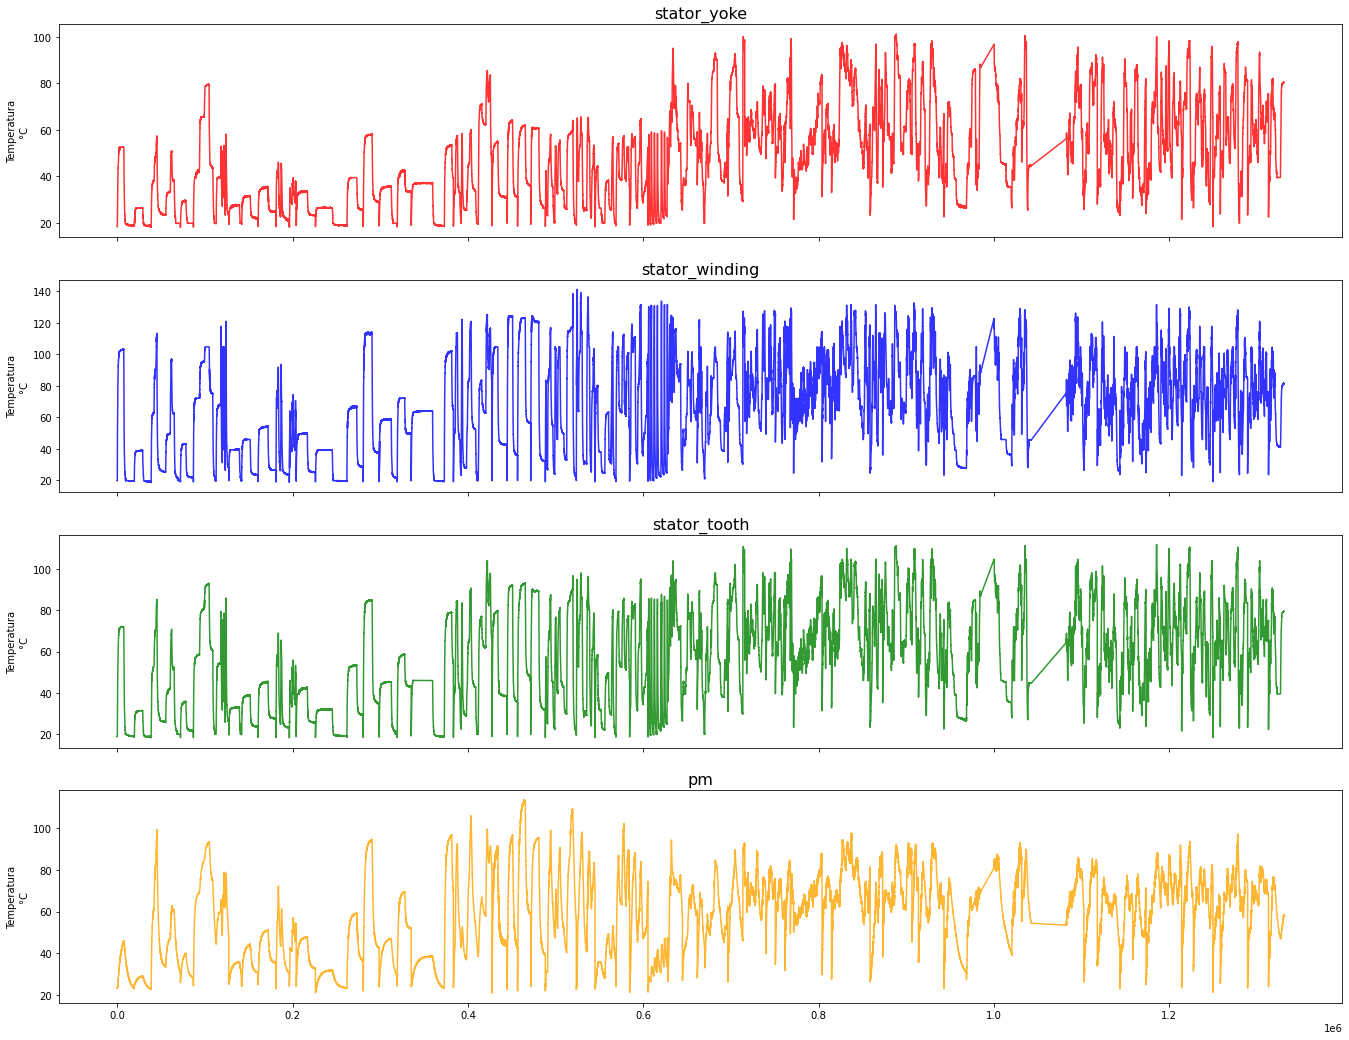

In [182]:
# LISTA DE CORES A SEREM USADAS NA PLOTAGEM DE GRÁFICOS
colors = itertools.cycle(["red", "blue", "green", "orange"])

# SELECIONANDO SOMENTE OS DADOS DE TREINO PARA PLOTAGEM
temp = df[~dataset.profile_id.isin([65, 72])]

# PLOTANDO TEMPERATURA DAS VARIÁVEIS ALVO
fig, axes = plt.subplots(4, 1, sharex=True, sharey='row', figsize=(23,18))

for idx, target in enumerate(target_name):
    ax = axes[idx]
    ax.set_title(target, fontdict=dict(fontsize=16))
    
    ax.plot(temp[target], color=next(colors), linestyle='-', alpha=0.8)
    ax.set_ylabel('Temperatura\n°C')

In [115]:
# FUNÇÃO PARA PLOTAGEM DO HISTOGRAMA E BOXPLOT DAS VARIÁVEIS

def plot_distibution(df, features):    
    for feature in features:    
        plt.figure(figsize=(10,4))

        plt.subplot(1, 2, 1)
        fig = df[feature].hist(bins=28)
        fig.set_title('Histogram')
        fig.set_xlabel(feature)

        plt.subplot(1, 2, 2)
        fig = df.boxplot(column=feature)
        fig.set_title('Boxplot')
        fig.set_ylabel(feature)

        plt.show()

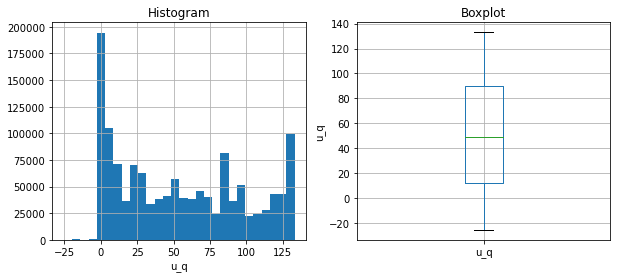

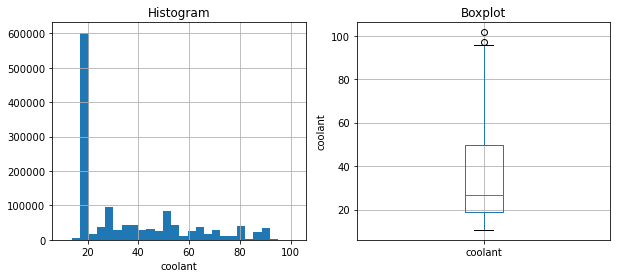

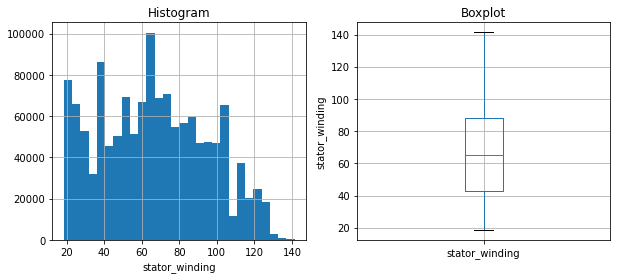

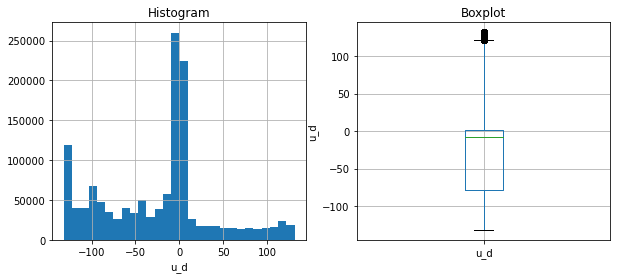

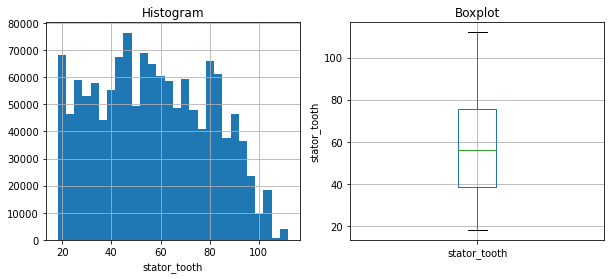

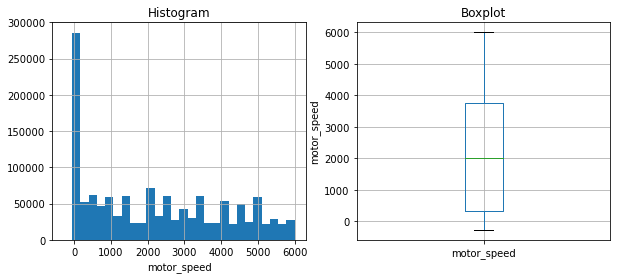

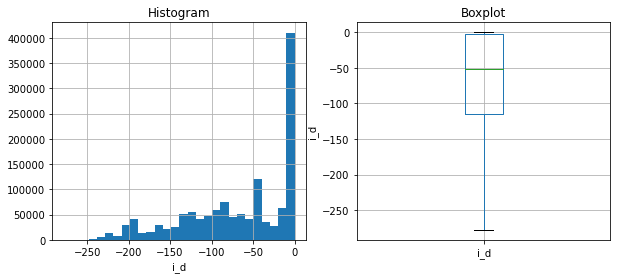

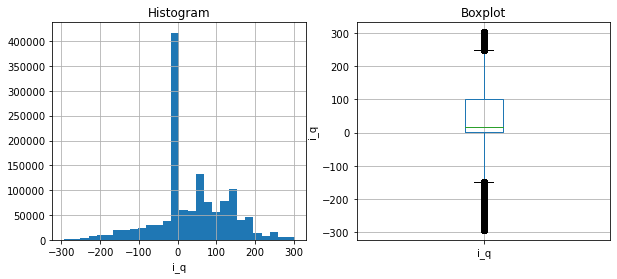

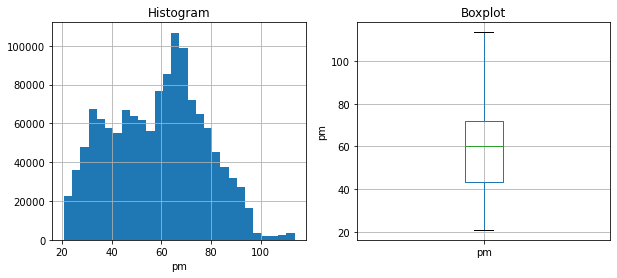

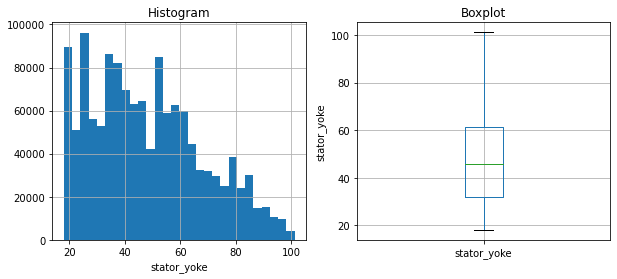

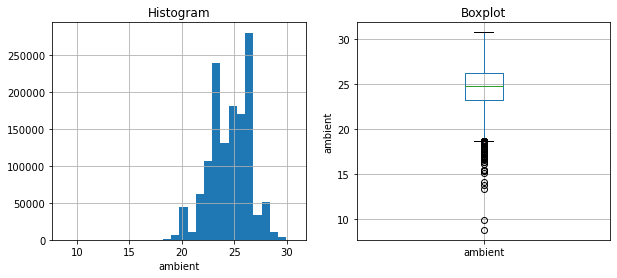

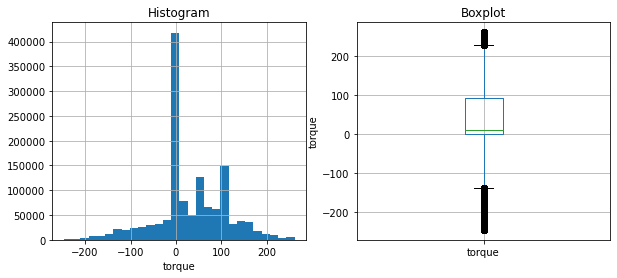

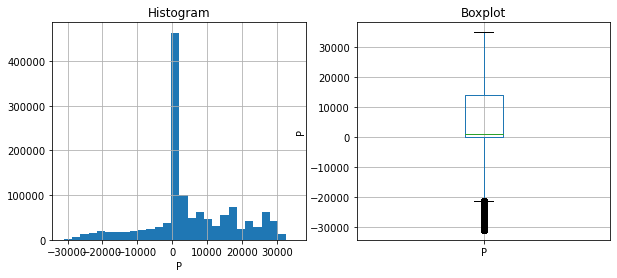

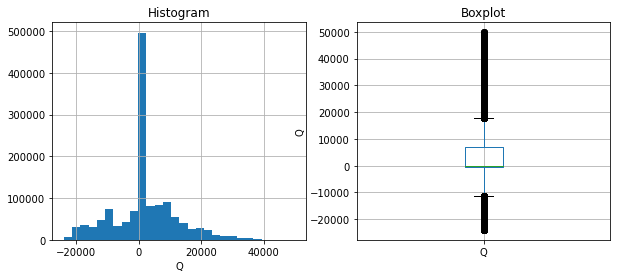

In [116]:
# CHAMANDO FUNÇÃO
plot_distibution(dataset, columns_name)

# Tratando Outliers

In [141]:
# FUNÇÃO PARA LIMITAR OS VALORES OUTLIERS A UM VALOR MÁXIMO NAS VARIÁVEIS COM DISTRIBUIÇÃO SKEWED

def skewed_boundaries(df, variable, distance):

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [142]:
# FUNÇÃO PARA LIMITAR OS VALORES OUTLIERS A UM VALOR MÁXIMO NAS VARIÁVEIS COM DISTRIBUIÇÃO GAUSSIAN

def normal_boundaries(df, variable, distance):

    upper_boundary = df[variable].mean() + distance * df[variable].std()
    lower_boundary = df[variable].mean() - distance * df[variable].std()

    return upper_boundary, lower_boundary

In [143]:
# AS DISTRIBUIÇÕES DOS VALORES DAS VARIÁVEIS NÃO SÃO COMPLETAMENTE SKEWED E GAUSSIAN MAS MESMO ASSIM USAREMOS COMO TAL PARA TRATAMENTO DOS VALORES OUTLIERS.
# DEFININDO LISTAS COM VARIÁVEIS PARA OUTLIERS
skewed_outliers = ['coolant', 'ambient', 'Q']
guassian_outliers = ['u_d', 'i_q', 'torque', 'P']

In [144]:
# APLICANDO FUNÇÕES DE OUTLIERS NOS RESPECTIVOS ATRIBUTOS

def censoring_outliers(df, features_skewed, features_gaussian):
    new_df = df.copy(deep=True)
    
    for feature in features_skewed:        
        upper_limit, lower_limit = skewed_boundaries(new_df, feature, 1.5)
        
        new_df[feature] = np.where(new_df[feature] > upper_limit, upper_limit, 
                                   np.where(new_df[feature] < lower_limit, lower_limit, new_df[feature]))        
    
    for feature in features_gaussian:        
        upper_limit, lower_limit = normal_boundaries(new_df, feature, 3)
        
        new_df[feature] = np.where(new_df[feature] > upper_limit, upper_limit, 
                                   np.where(new_df[feature] < lower_limit, lower_limit, new_df[feature]))  
        
    return new_df        

In [145]:
# DEFININDO NOVO DATAFRAME COM AS ALTERAÇÕES DE OUTLIERS
df = censoring_outliers(dataset, skewed_outliers, guassian_outliers)

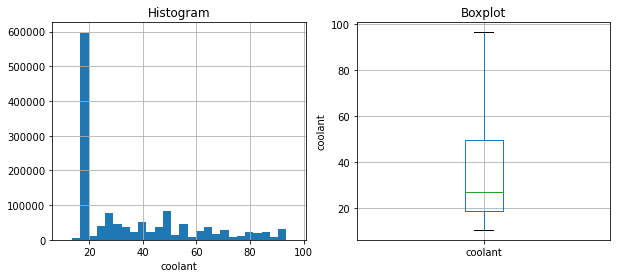

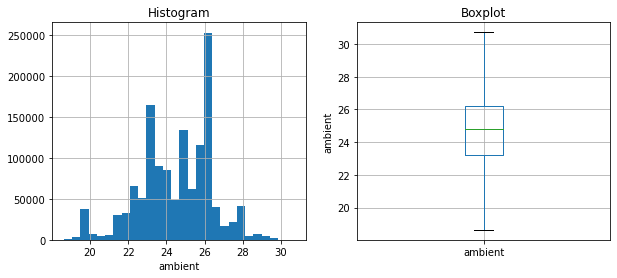

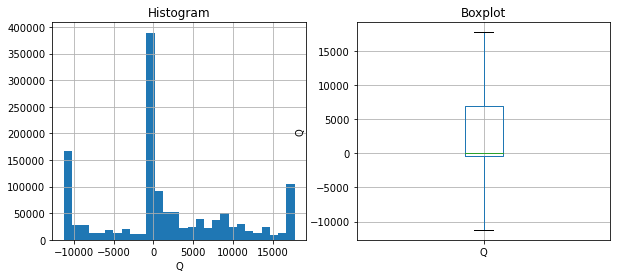

In [122]:
# VISUALIZANDO DISTRIBUIÇÃO DOS ATRIBUTOS SKEWED APÓS TRATAMENTO DOS DADOS
plot_distibution(df, skewed_outliers)

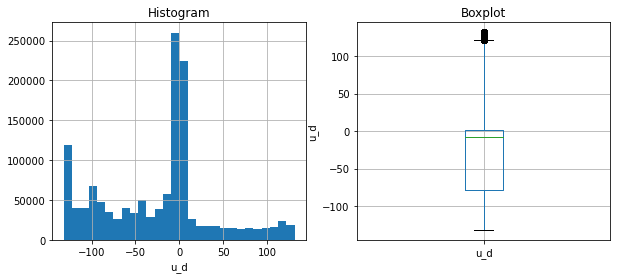

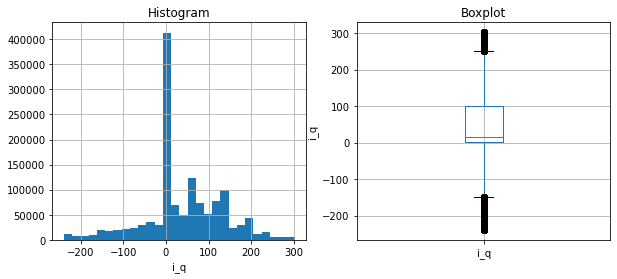

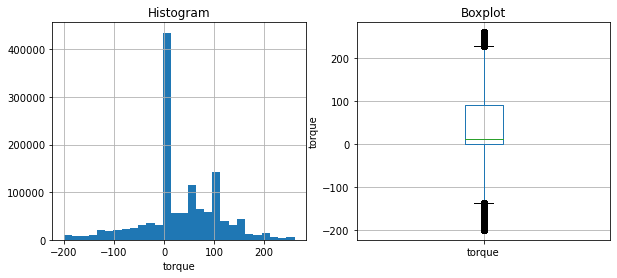

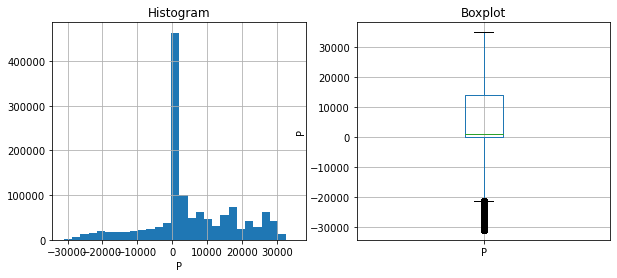

In [123]:
# VISUALIZANDO DISTRIBUIÇÃO DOS ATRIBUTOS GAUSSIAN APÓS TRATAMENTO DOS DADOS
plot_distibution(df, guassian_outliers)

A aplicação deste código foi de ajuda dos experts do kaggle que aplicaram as devidas transformações para obter novos atributos que agregarão ao score do modelo.

In [146]:
spans = [6360, 3360, 1320, 9480]  # esses valores correspondem às frequências de corte em termos de filtros passa-baixa, ou meia-vida em termos de EWMAs, respectivamente
max_span = max(spans)
new_data = []

for profile_id, df_profile in df.groupby(['profile_id']):
    
    target_df = df_profile.loc[:, target_name].reset_index(drop=True)
    
    # Retirando colunas em que o EWMA não será calculado
    df_profile = df_profile.drop(target_name + ['profile_id'], axis=1).reset_index(drop=True)
    
    # Pré-adição com os primeiros valores repetidos até a amplitude máxima, a fim de obter o EWMA imparcial durante as primeiras observações
    prepadding = pd.DataFrame(np.zeros((max_span, len(df_profile.columns))),columns=df_profile.columns)
    temperature_cols = [c for c in ['ambient', 'coolant'] if c in dataset]
    prepadding.loc[:, temperature_cols] = df_profile.loc[0, temperature_cols].values
    
    prepadded_df = pd.concat([prepadding, df_profile], axis=0, ignore_index=True)
    ewma = pd.concat([prepadded_df.ewm(span=s).mean().rename(columns=lambda c: f'{c}_ewma_{s}') for s in spans], axis=1).astype(np.float32)
    ewma = ewma.iloc[max_span:, :].reset_index(drop=True)
    
    new_p_df = pd.concat([df_profile, ewma, target_df], axis=1)
    new_p_df['profile_id'] = profile_id
    new_data.append(new_p_df.dropna())

df = pd.concat(new_data, axis=0, ignore_index=True)

In [147]:
# VISUALIZANDO DATAFRAME APÓS TRATAMENTO DOS DADOS
df.head()

,u_q,coolant,u_d,motor_speed,i_d,i_q,ambient,torque,P,Q,...,i_q_ewma_9480,ambient_ewma_9480,torque_ewma_9480,P_ewma_9480,Q_ewma_9480,stator_yoke,stator_winding,stator_tooth,pm,profile_id
0,4.921712,15.717488,0.051183,99.964539,-0.000385,0.000221,19.995035,-0.605463,0.001069,-0.002856,...,5.398247e-08,19.995035,-0.000148,2.608836e-07,-6.968622e-07,18.395088,19.729197,18.889385,23.153740,2
1,4.948537,15.890841,0.074807,100.017822,-0.002003,0.000886,19.954098,-0.613076,0.004236,-0.014971,...,2.701571e-07,19.995026,-0.000297,1.294072e-06,-4.348849e-06,18.376493,19.737572,18.895809,23.153469,2
2,4.941477,15.992567,0.063648,99.999977,0.000156,-0.000046,19.924765,-0.615070,-0.000216,0.001163,...,2.589443e-07,19.995008,-0.000447,1.241102e-06,-4.063977e-06,18.371748,19.740677,18.902767,23.147993,2
3,4.921178,16.135164,0.076738,99.980309,0.001466,-0.001133,19.903748,-0.617488,-0.005464,0.010948,...,-1.753691e-08,19.994986,-0.000598,-9.207086e-08,-1.392302e-06,18.375002,19.727468,18.908100,23.135658,2
4,4.924347,16.165384,0.084553,100.023392,0.000682,0.003452,19.888687,-0.606528,0.017057,0.004603,...,8.245317e-07,19.994961,-0.000746,4.068643e-06,-2.692910e-07,18.378679,19.730543,18.876144,23.137959,2


# Separando Dados de Treino e Teste e Variáveis Preditóras e Alvos

In [148]:
# LISTA DOS ATRIBUTOS PREDITÓRES
features_name = [x for x in list(df.columns) if x not in target_name]

In [149]:
# SEPARANDO DADOS DE TREINO E TESTE
index_train_test = dataset.profile_id.isin([65, 72])

df_train = df[~index_train_test]
df_test = df[index_train_test]

In [150]:
# MUDANDO FORMATO DAS VARIÁVEIS ALVO
y_train = np.asarray(df_train[target_name])
y_test = np.asarray(df_test[target_name])

# ATRIBUTOS DE TREINO E TESTE
x_train = df_train[features_name]
x_test = df_test[features_name]

# Feature Scaling

In [151]:
# CRIAÇÃO DO MÉTODO DE PADRONIZAÇÃO
standard_scale = StandardScaler()
#min_max_scaler = MinMaxScaler()

# TREINANDO MÉTODO
standard_scale.fit(x_train)

# TRANSFORMANDO ATRIBUTOS
x_train_scaled = standard_scale.transform(x_train)
x_test_scaled = standard_scale.transform(x_test)

# Treinamento

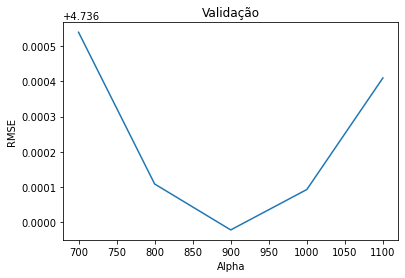

In [153]:
# VALORES DE ALPHA PARA TESTAR COM O MODELO RIDGE
alphas = [700, 800, 900, 1000, 1100]

# FUNÇÃO PARA CALCULAR O RMSE
def rmse_cv(modelo):
    rmse = np.sqrt(-cross_val_score(modelo, x_train_scaled, y_train, scoring = "neg_mean_squared_error", cv = 5))
    return(rmse)

# PLOT DA RELAÇÃO ENTRE O VALOR DE ALPHA E O RMSE
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validação")
plt.xlabel("Alpha")
plt.ylabel("RMSE")
plt.show()

In [169]:
# CRIANDO MODELO DE REGRESSÃO
ridge_regressor = Ridge(alpha=900)

# TREINANDO MODELO
modelo = ridge_regressor.fit(x_train_scaled, y_train)

# Previsões

In [170]:
# FAZENDO PREVISÕES
y_pred_train = modelo.predict(x_train_scaled)
y_pred_test = modelo.predict(x_test_scaled)

# Avaliação

In [171]:
# MÉTRICAS DE AVALIAÇÃO DOS DADOS DE TREINO

mse = mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)
print('Métricas dados de treino:')
print('MSE:      {:.3f}'.format(mse))
print('RMSE:     {:.3f}'.format(rmse))
print('MAE:      {:.3f}'.format(mae))
print('r2-score: {:.3f}'.format(r2))

Métricas dados de treino:
MSE:      14.117
RMSE:     3.757
MAE:      2.600
r2-score: 0.975


In [172]:
# MÉTRICAS DE AVALIAÇÃO DOS DADOS DE TESTE

mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
print('Métricas dados de validação:')
print('MSE:      {:.3f}'.format(mse))
print('RMSE:     {:.3f}'.format(rmse))
print('MAE:      {:.3f}'.format(mae))
print('r2-score: {:.3f}'.format(r2))

Métricas dados de validação:
MSE:      8.311
RMSE:     2.883
MAE:      2.157
r2-score: 0.967


# Visualizando resultados

## Previsões dos Valores de teste

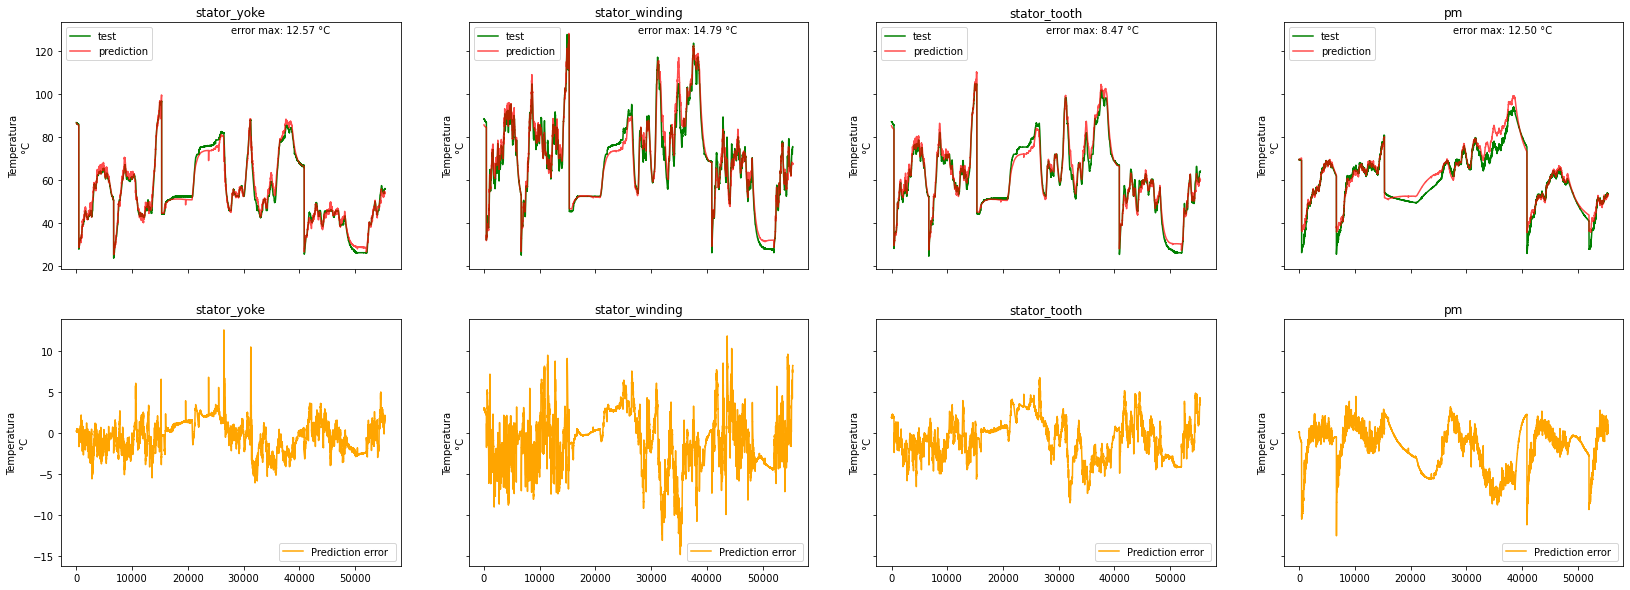

In [173]:
fig, axes = plt.subplots(2, 4, sharex=True, sharey='row', figsize=(28,10))

for x in range(0, y_pred_test.shape[1]):
    ax = axes[0, x]
    error = abs(y_test[:,x] - y_pred_test[:,x])
    ax.text(0.5, 0.95, s=r'error max: ' + f'{error.max():.2f} °C', verticalalignment='bottom', horizontalalignment='left', transform=ax.transAxes)    
    ax.set_title(target_name[x], fontdict=dict(fontsize=12))
    ax.plot(y_test[:,x], color='green', label='test', linestyle='-')
    ax.plot(y_pred_test[:,x], color='red', label='prediction', linestyle='-', alpha=0.7)
    ax.set_ylabel('Temperatura\n°C')
    ax.legend(ncol=1, loc='upper left')
    
    ax = axes[1, x]
    error = y_test[:,x] - y_pred_test[:,x]    
    ax.plot(error, color='orange', label='Prediction error ')    
    ax.set_title(target_name[x], fontdict=dict(fontsize=12))
    ax.set_ylabel('Temperatura\n°C')
    ax.legend(ncol=1, loc='lower right')

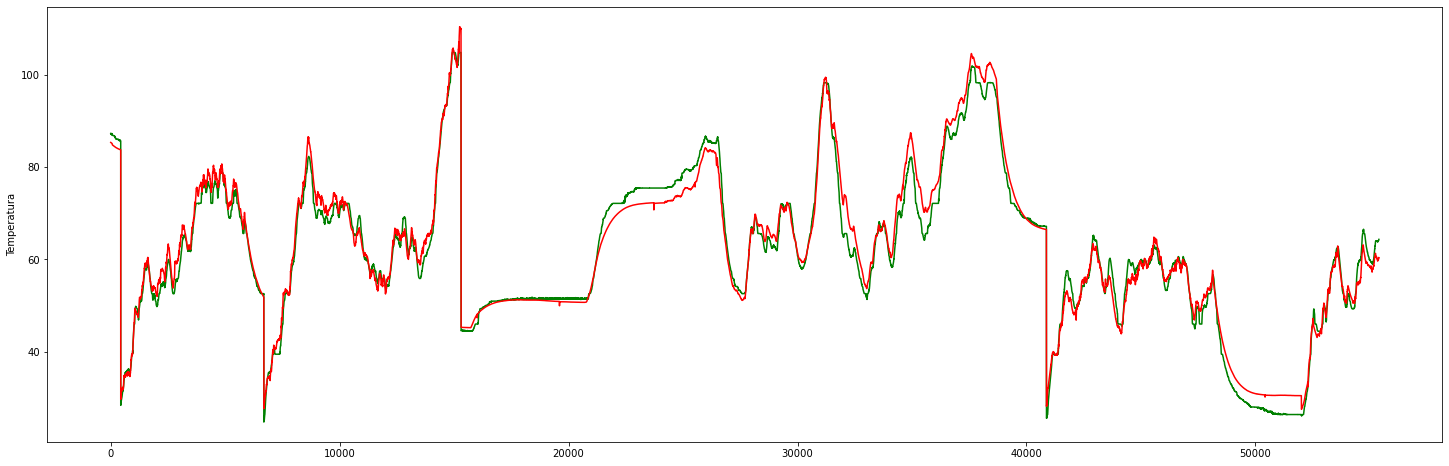

In [175]:
# VISUALIZAÇÃO INDIVIDUAL DO ATRIBUTO STATOR TOOTH

plt.figure(figsize=(25,8))
plt.plot(y_test[:,2], label='Real data', color='green', linestyle='-')
plt.plot(y_pred_test[:,2], label='Prediction dada', color='red', linestyle='-')
plt.ylabel('Temperatura')
plt.show()

## Previsões dos Valores de Treino

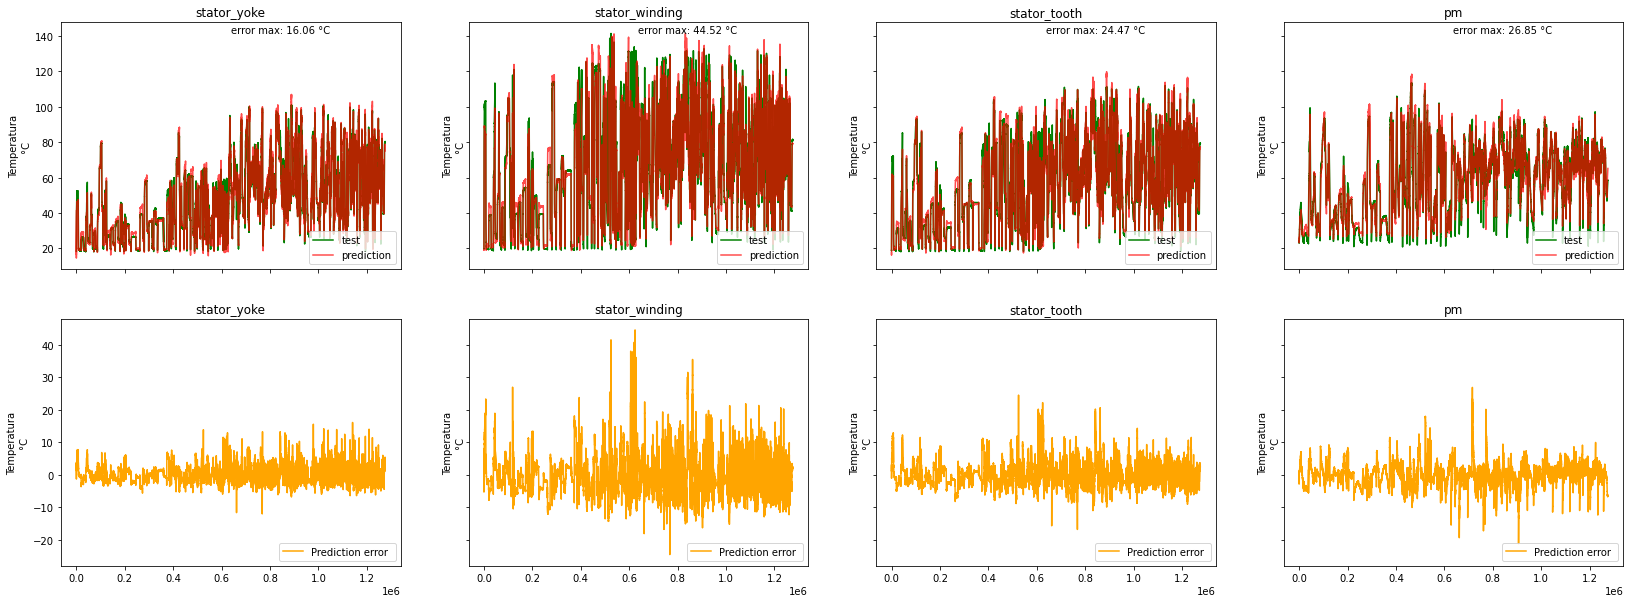

In [177]:
fig, axes = plt.subplots(2, 4, sharex=True, sharey='row', figsize=(28,10))

for x in range(0, y_pred_train.shape[1]):
    ax = axes[0, x]
    error = abs(y_train[:,x] - y_pred_train[:,x])
    ax.text(0.5, 0.95, s=r'error max: ' + f'{error.max():.2f} °C', verticalalignment='bottom', horizontalalignment='left', transform=ax.transAxes)    
    ax.set_title(target_name[x], fontdict=dict(fontsize=12))
    ax.plot(y_train[:,x], color='green', label='test', linestyle='-')
    ax.plot(y_pred_train[:,x], color='red', label='prediction', linestyle='-', alpha=0.7)
    ax.set_ylabel('Temperatura\n°C')
    ax.legend(ncol=1, loc='lower right')
    
    ax = axes[1, x]
    error = y_train[:,x] - y_pred_train[:,x]    
    ax.plot(error, color='orange', label='Prediction error ')    
    ax.set_title(target_name[x], fontdict=dict(fontsize=12))
    ax.set_ylabel('Temperatura\n°C')
    ax.legend(ncol=1, loc='lower right')

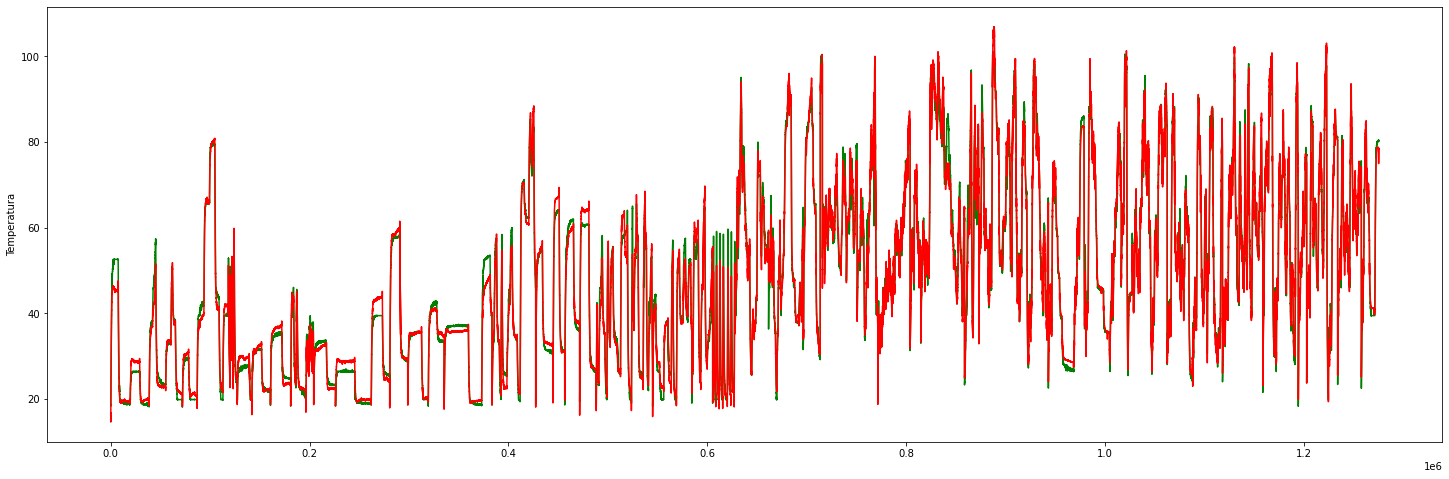

In [184]:
# VISUALIZAÇÃO INDIVIDUAL DO ATRIBUTO STATOR TOOTH

plt.figure(figsize=(25,8))
plt.plot(y_train[:,0], label='Real data', color='green', linestyle='-')
plt.plot(y_pred_train[:,0], label='Prediction dada', color='red', linestyle='-')
plt.ylabel('Temperatura')
plt.show()